In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
employee_data = pd.read_csv(r"/content/gdrive/MyDrive/Attrition data.csv")
employee_data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
#checking duplicate data like labels or features or client id/number
print(employee_data['EmployeeID'].is_unique)
print(employee_data.columns.is_unique)

True
True


In [ ]:
#checking any missing data and dropping non-significant features
employee_data.drop('EmployeeID' , axis =1 , inplace = True)
pd.isna(employee_data).any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [ ]:
# Dropping rows with any NaN or missing value values
employee_data.dropna(inplace=True)

#checking any missing data and dtypes info details
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeCount            4300 non-null   int64  
 8   Gender                   4300 non-null   object 
 9   JobLevel                 4300 non-null   int64  
 10  JobRole                  4300 non-null   object 
 11  MaritalStatus            4300 non-null   object 
 12  MonthlyIncome            4300 non-null   int64  
 13  NumCompaniesWorked       4300 non-null   float64
 14  Over18                  

In [ ]:
#our data is mostly cleaned so moving to EDA and data processing

#segregating columns with float or numerical values to that of categorical or object datatype columns
numerical_columns = [cols for cols in employee_data.columns if employee_data[cols].dtype == int or employee_data[cols].dtype == float]
categorical_columns = [cols for cols in employee_data.columns if employee_data[cols].dtype == 'object']

print(f"Categorical Columns : {categorical_columns} \nNumerical Columns : {numerical_columns}")

Categorical Columns : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18'] 
Numerical Columns : ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']


In [ ]:
#for numerical column checking presence and removal of any outliers
#Dropping outliers by IQR Calculation

columns = ['Age' , 'MonthlyIncome' , 'TotalWorkingYears' , 'YearsAtCompany' , 'YearsSinceLastPromotion']

def dropping_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q2 = df[col].quantile(0.50)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1
  # FindING the index of rows with outliers in the specified column
  outlier_indices = df[(df[col] < (Q1 -  1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))].index
  print(outlier_indices)

  # DropPING the rows with outlier values

  return outlier_indices

# Performing on all numerical columns
dropping_indices  = pd.Index([])
for i in columns:
  dropping_indices = dropping_indices.union(dropping_outliers(employee_data, i))

employee_data = employee_data.drop(dropping_indices)


# Now, employee data contains rows with outliers removed for all numerical columns
# Checking the summary statistics for df1
employee_data[numerical_columns].describe()

Int64Index([], dtype='int64')
Int64Index([   2,   55,   56,   73,   76,   99,  102,  126,  162,  168,
            ...
            4261, 4264, 4270, 4275, 4289, 4319, 4320, 4360, 4377, 4399],
           dtype='int64', length=331)
Int64Index([  12,  121,  143,  150,  153,  166,  187,  215,  219,  276,
            ...
            4170, 4214, 4237, 4250, 4257, 4278, 4339, 4342, 4385, 4389],
           dtype='int64', length=186)
Int64Index([  10,   12,   37,   42,   53,   56,   68,  132,  142,  153,
            ...
            4330, 4338, 4339, 4342, 4346, 4370, 4383, 4389, 4396, 4403],
           dtype='int64', length=306)
Int64Index([  13,   53,   55,   56,   61,   67,   68,   76,  126,  128,
            ...
            4278, 4330, 4338, 4342, 4346, 4362, 4370, 4383, 4389, 4403],
           dtype='int64', length=316)


,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,3455.000000,3455.000000,3455.000000,3455.0,3455.000000,3455.000000,3455.000000,3455.000000,3455.0,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000
mean,35.685962,9.115774,2.920405,1.0,2.094935,55131.036179,2.665412,15.254414,8.0,0.786686,9.393922,2.782344,5.426918,1.400289,3.531693,2.726773,2.723010,2.764689,2.715485,3.156874
std,8.636423,8.021318,1.016812,0.0,1.126465,33095.500321,2.480918,3.699300,0.0,0.855817,5.840053,1.263528,3.781576,1.953380,3.117292,1.091377,1.102705,0.699841,0.711255,0.363735
min,18.000000,1.000000,1.000000,1.0,1.000000,10510.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,29.000000,2.000000,2.000000,1.0,1.000000,28380.000000,1.000000,12.000000,8.0,0.000000,5.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,35.000000,7.000000,3.000000,1.0,2.000000,46680.000000,2.000000,14.000000,8.0,1.000000,9.000000,3.000000,5.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,41.000000,14.000000,4.000000,1.0,3.000000,68040.000000,4.000000,18.000000,8.0,1.000000,12.000000,3.000000,8.000000,2.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,164370.000000,9.000000,25.000000,8.0,3.000000,28.000000,6.000000,18.000000,7.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000


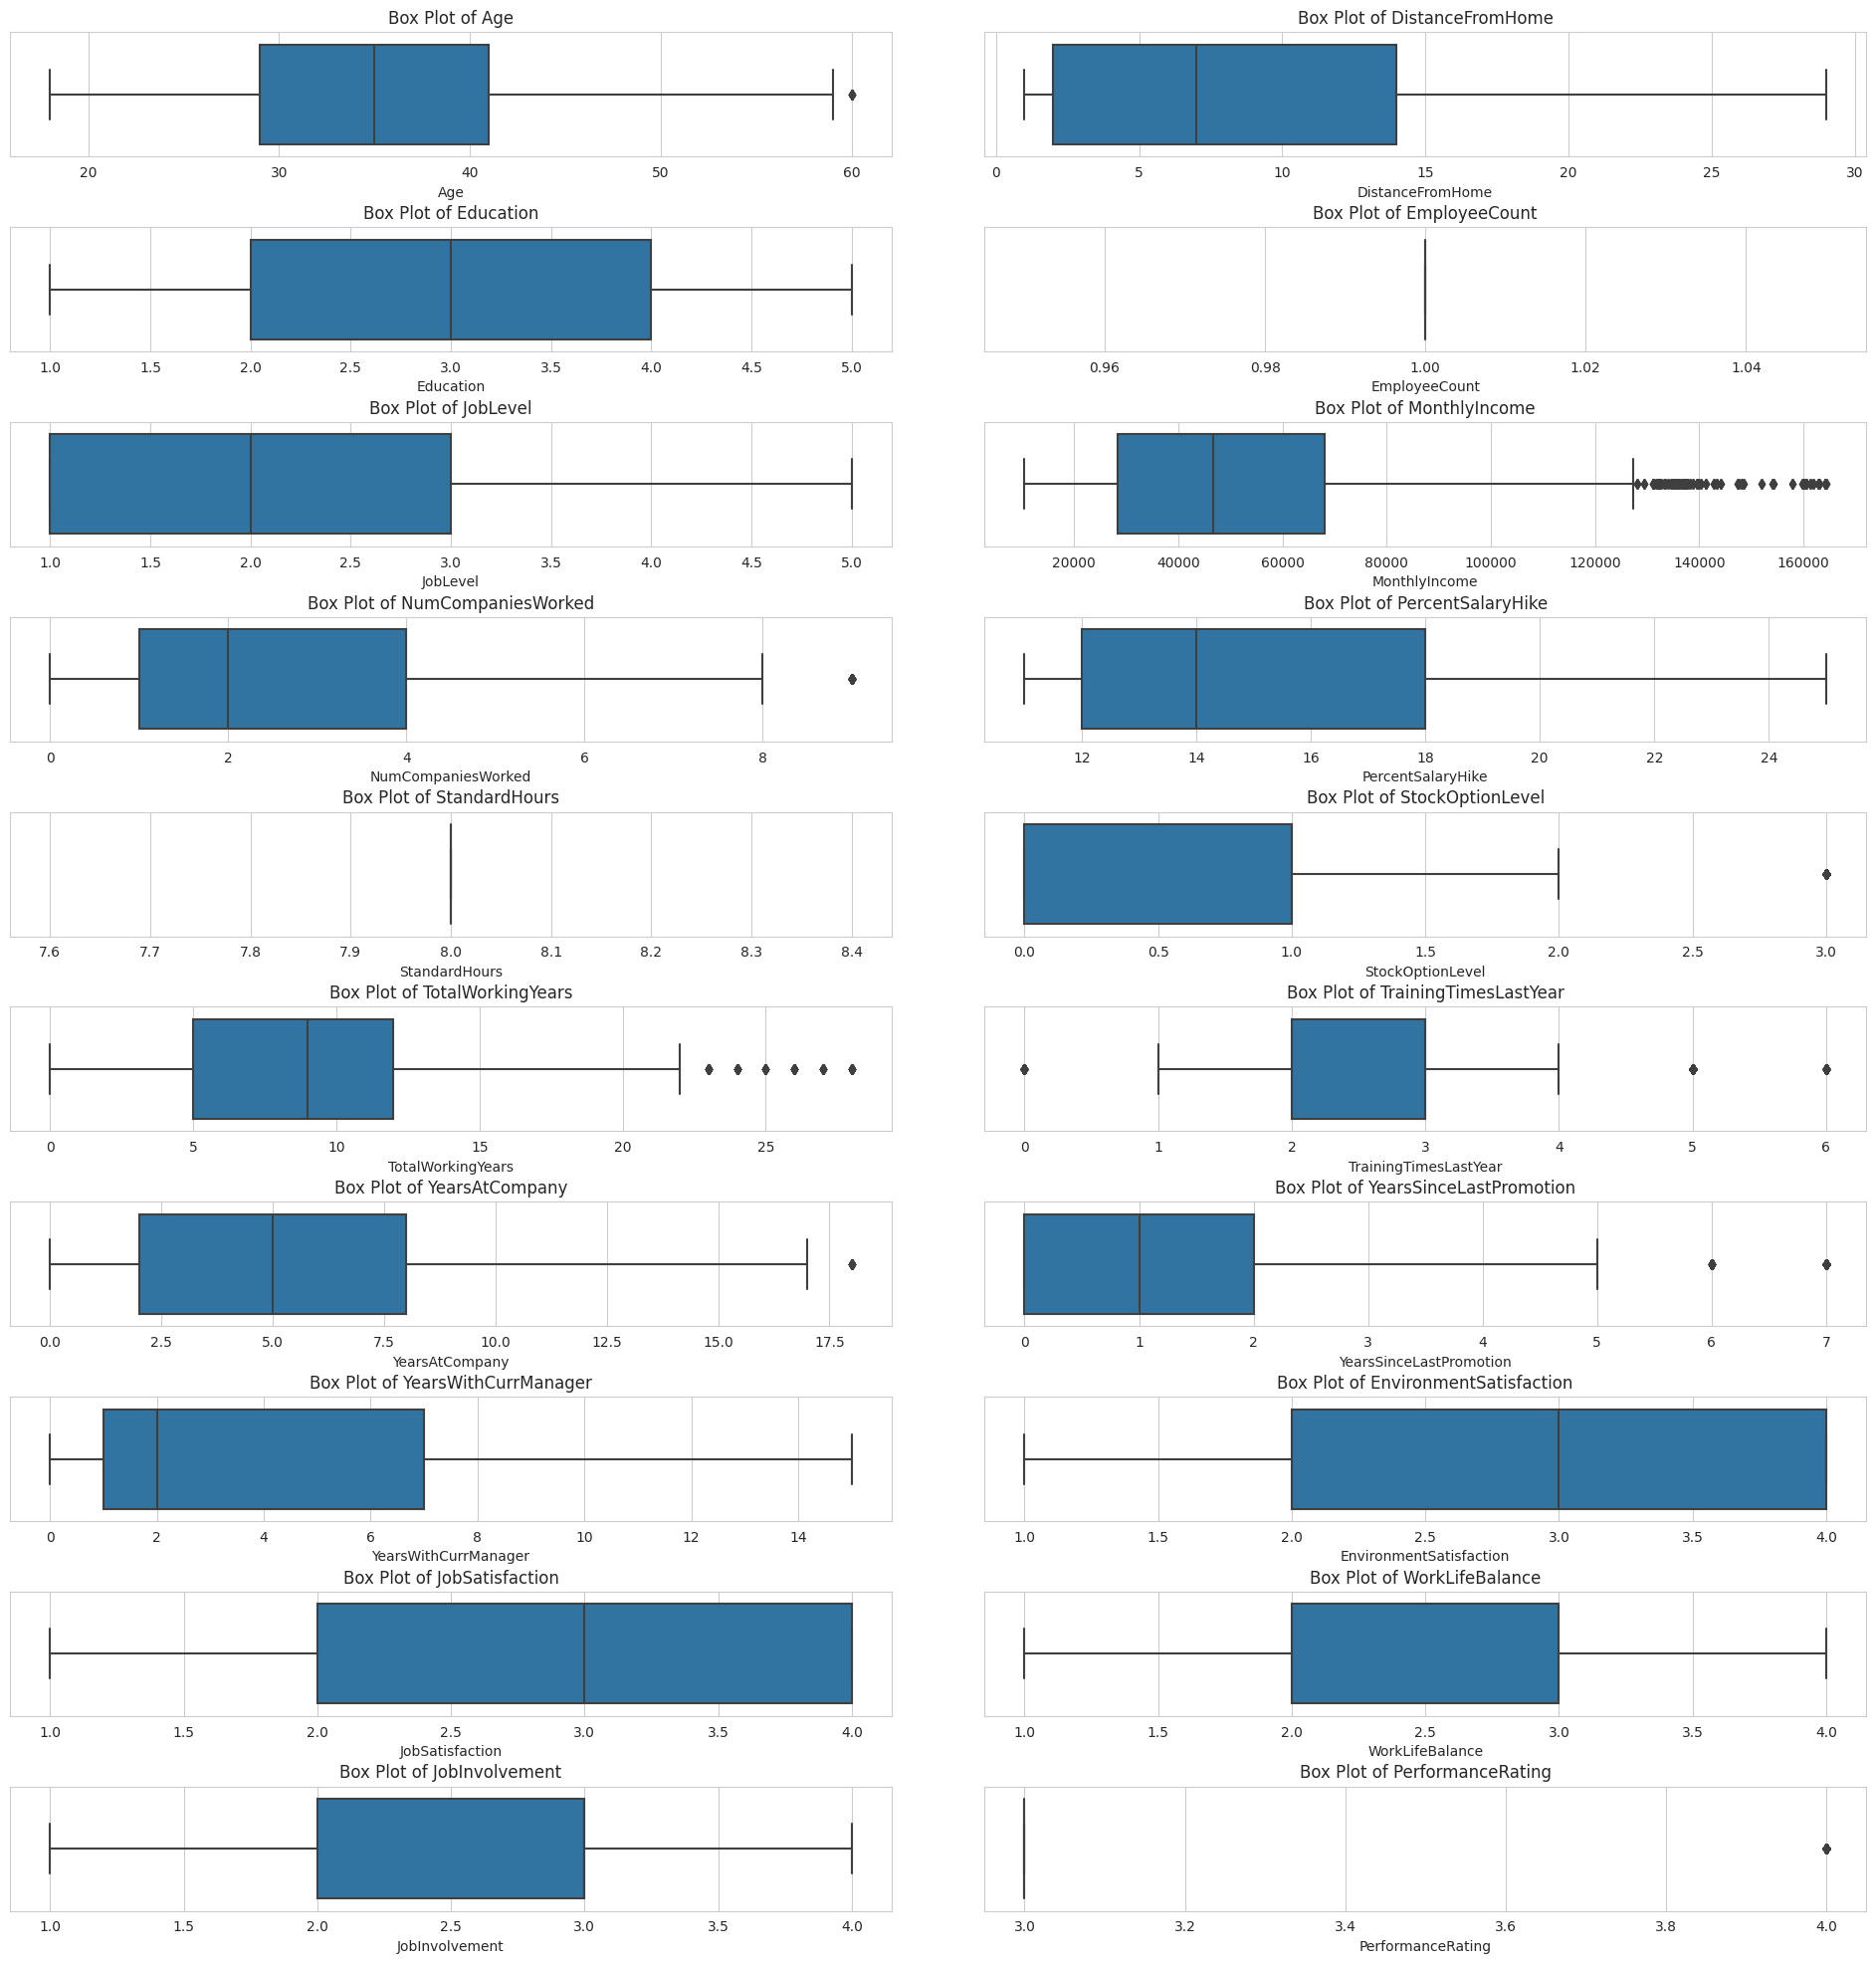

In [ ]:
#lets verify whether outliers are removed or not visually
import seaborn as sns


# Calculate the number of rows and columns for the subplot grid
num_cols = len(numerical_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.tight_layout(pad=3.0)  # Adjust the spacing between subplots


# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(numerical_columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    sns.boxplot(data=employee_data, x=col, ax=ax)
    ax.set_title(f"Box Plot of {col}")

# Remove any unused subplots
for i in range(len(numerical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
 employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 0 to 4408
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3455 non-null   int64  
 1   Attrition                3455 non-null   object 
 2   BusinessTravel           3455 non-null   object 
 3   Department               3455 non-null   object 
 4   DistanceFromHome         3455 non-null   int64  
 5   Education                3455 non-null   int64  
 6   EducationField           3455 non-null   object 
 7   EmployeeCount            3455 non-null   int64  
 8   Gender                   3455 non-null   object 
 9   JobLevel                 3455 non-null   int64  
 10  JobRole                  3455 non-null   object 
 11  MaritalStatus            3455 non-null   object 
 12  MonthlyIncome            3455 non-null   int64  
 13  NumCompaniesWorked       3455 non-null   float64
 14  Over18                  

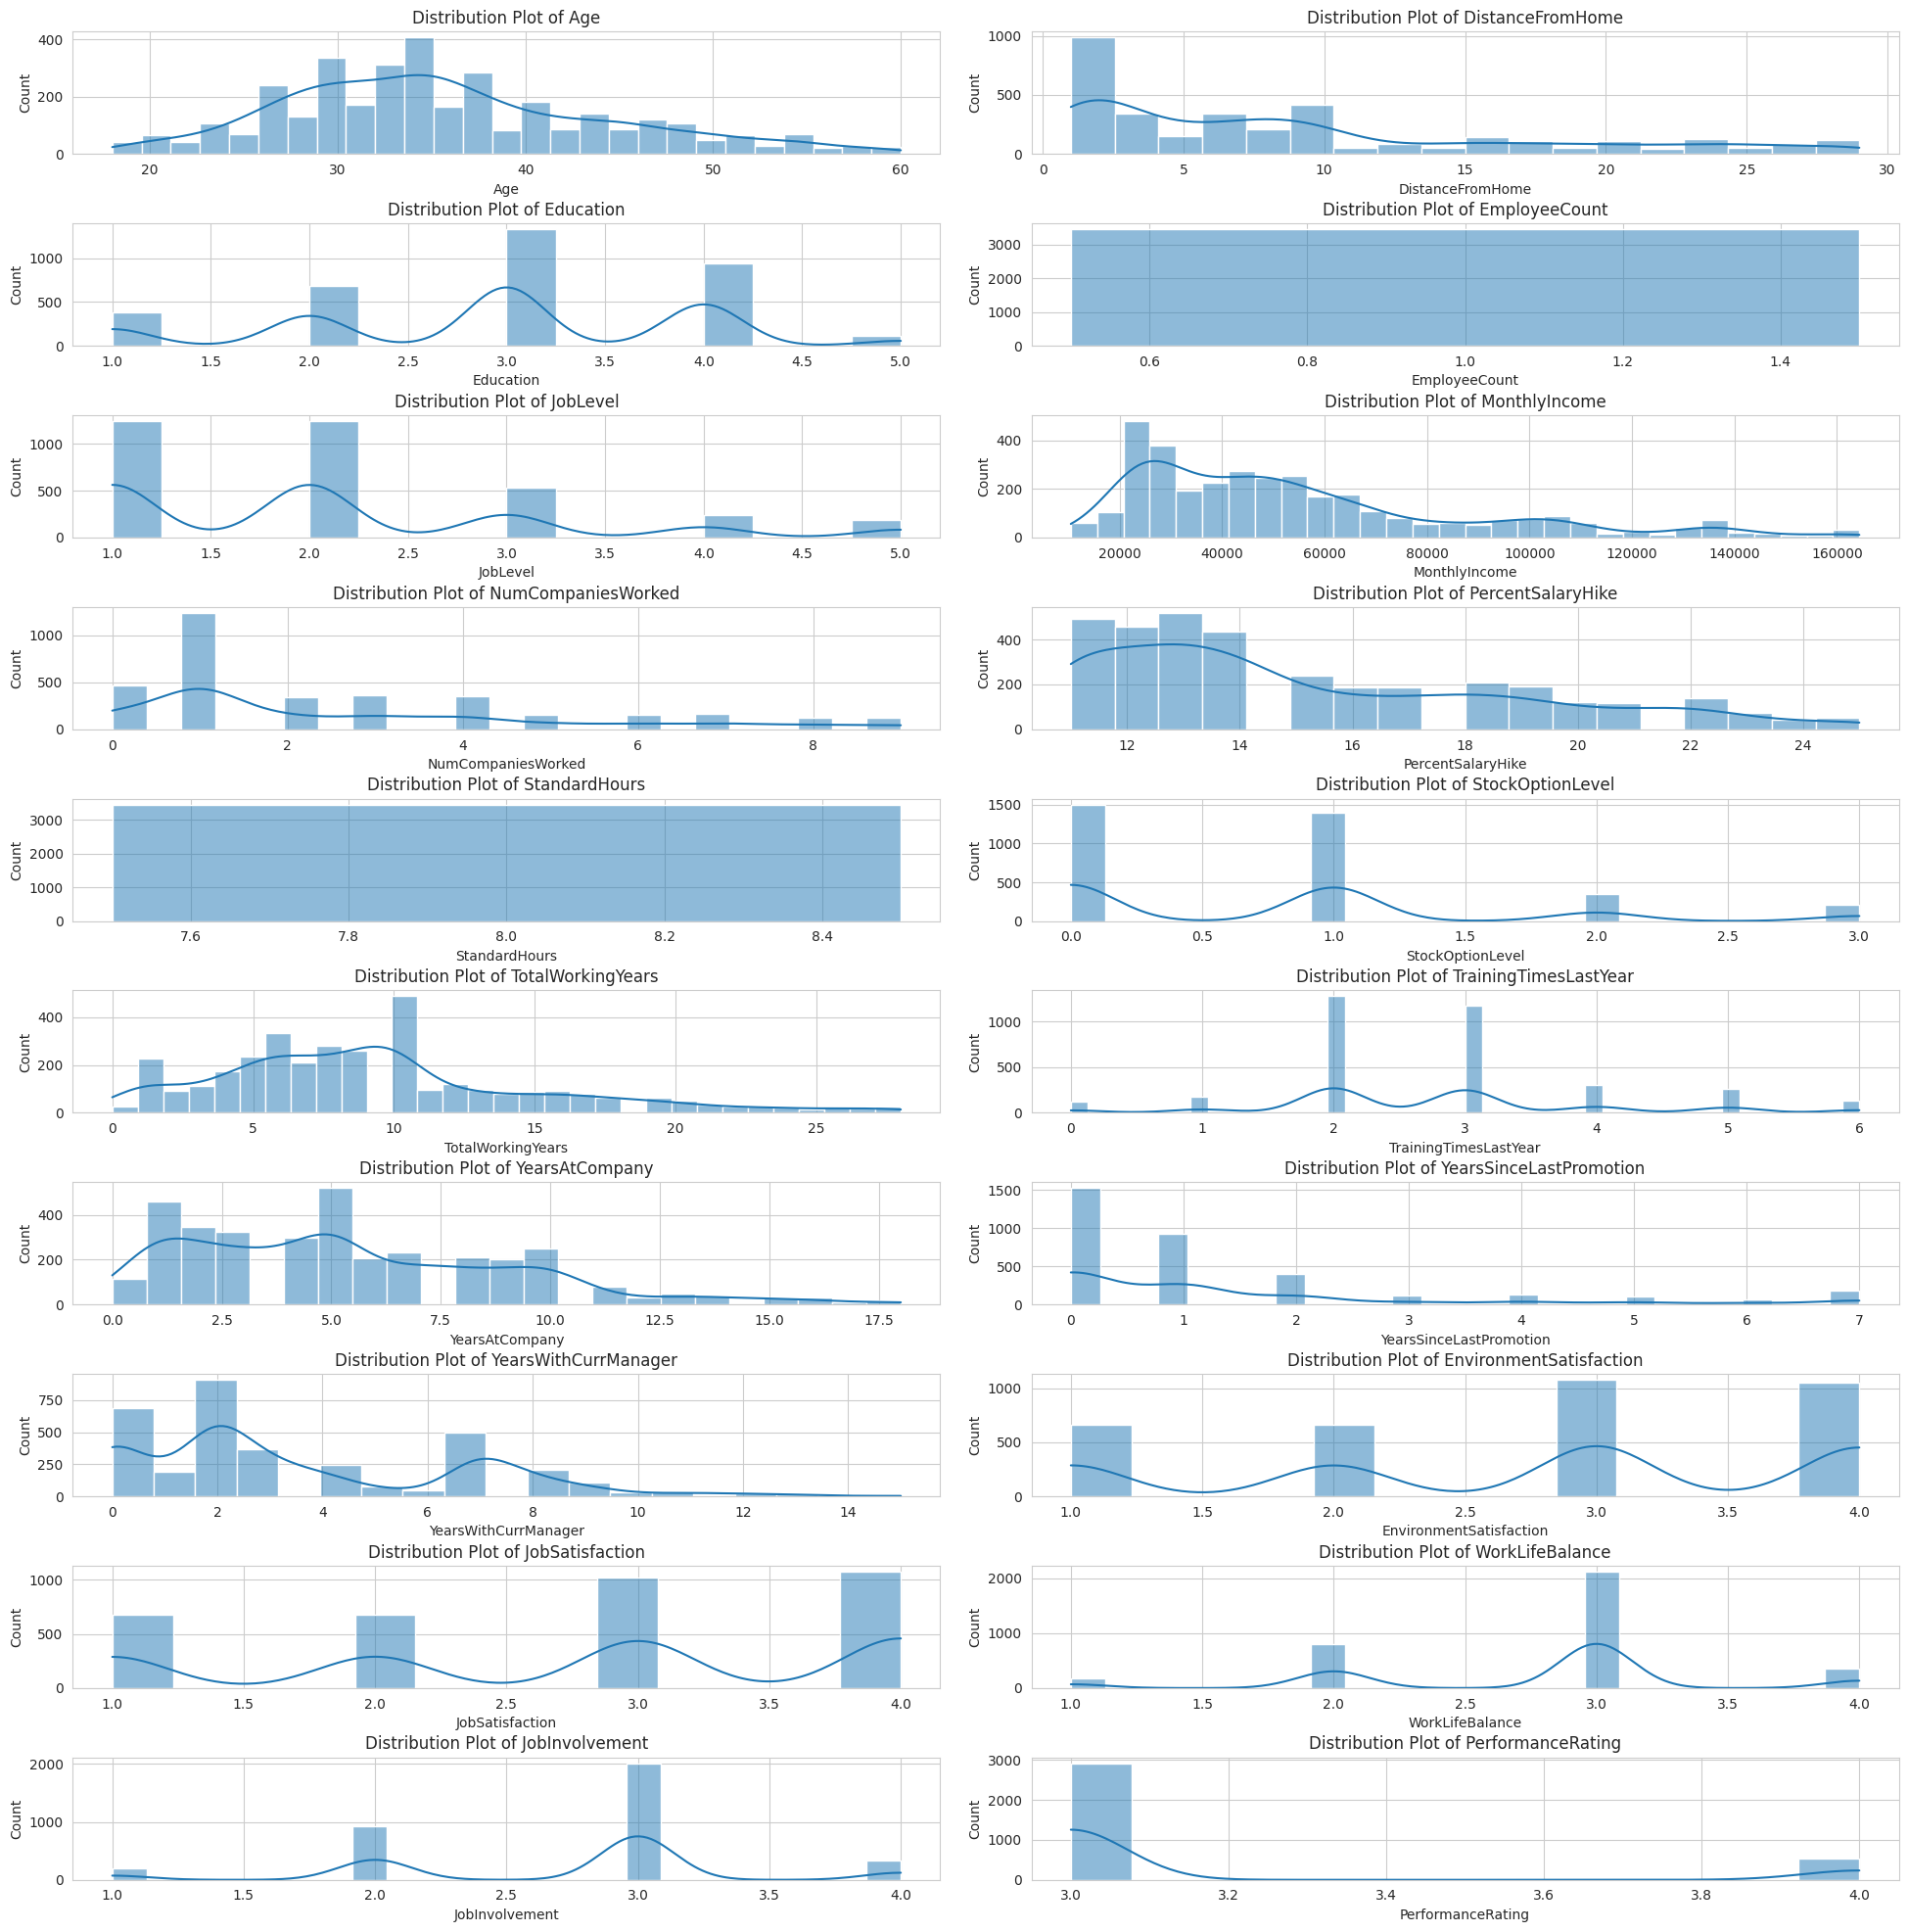

In [ ]:
#distribution plots for each of these numerical columns to measure their skewness and curtoisis
# Calculate the number of rows and columns for the subplot grid
num_cols = len(numerical_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.tight_layout(pad=3.0)  # Adjust the spacing between subplots

# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(numerical_columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    sns.histplot(data = employee_data[col] , ax=ax , kde = True )
    ax.set_title(f"Distribution Plot of {col}")

# Remove any unused subplots
for i in range(len(numerical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

<Axes: >

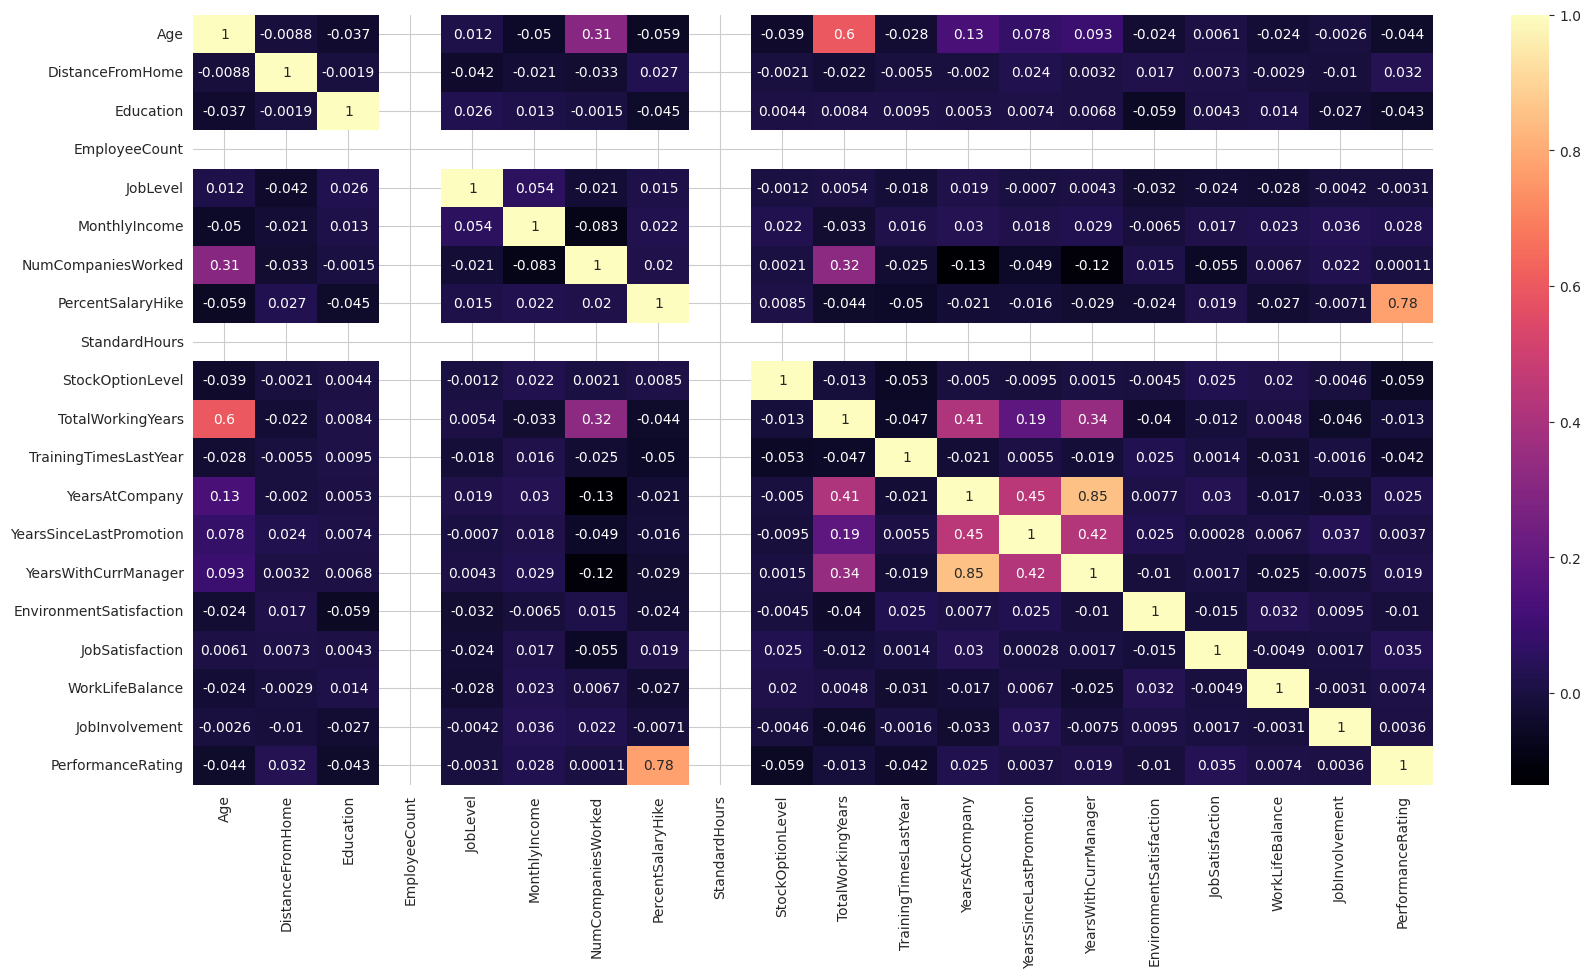

In [ ]:
#lets see how these features are correlated or dependent on each other using heat-map
plt.figure(figsize = (20,10))
c = employee_data[numerical_columns].corr()
sns.heatmap(c , cmap = 'magma' , annot = True)

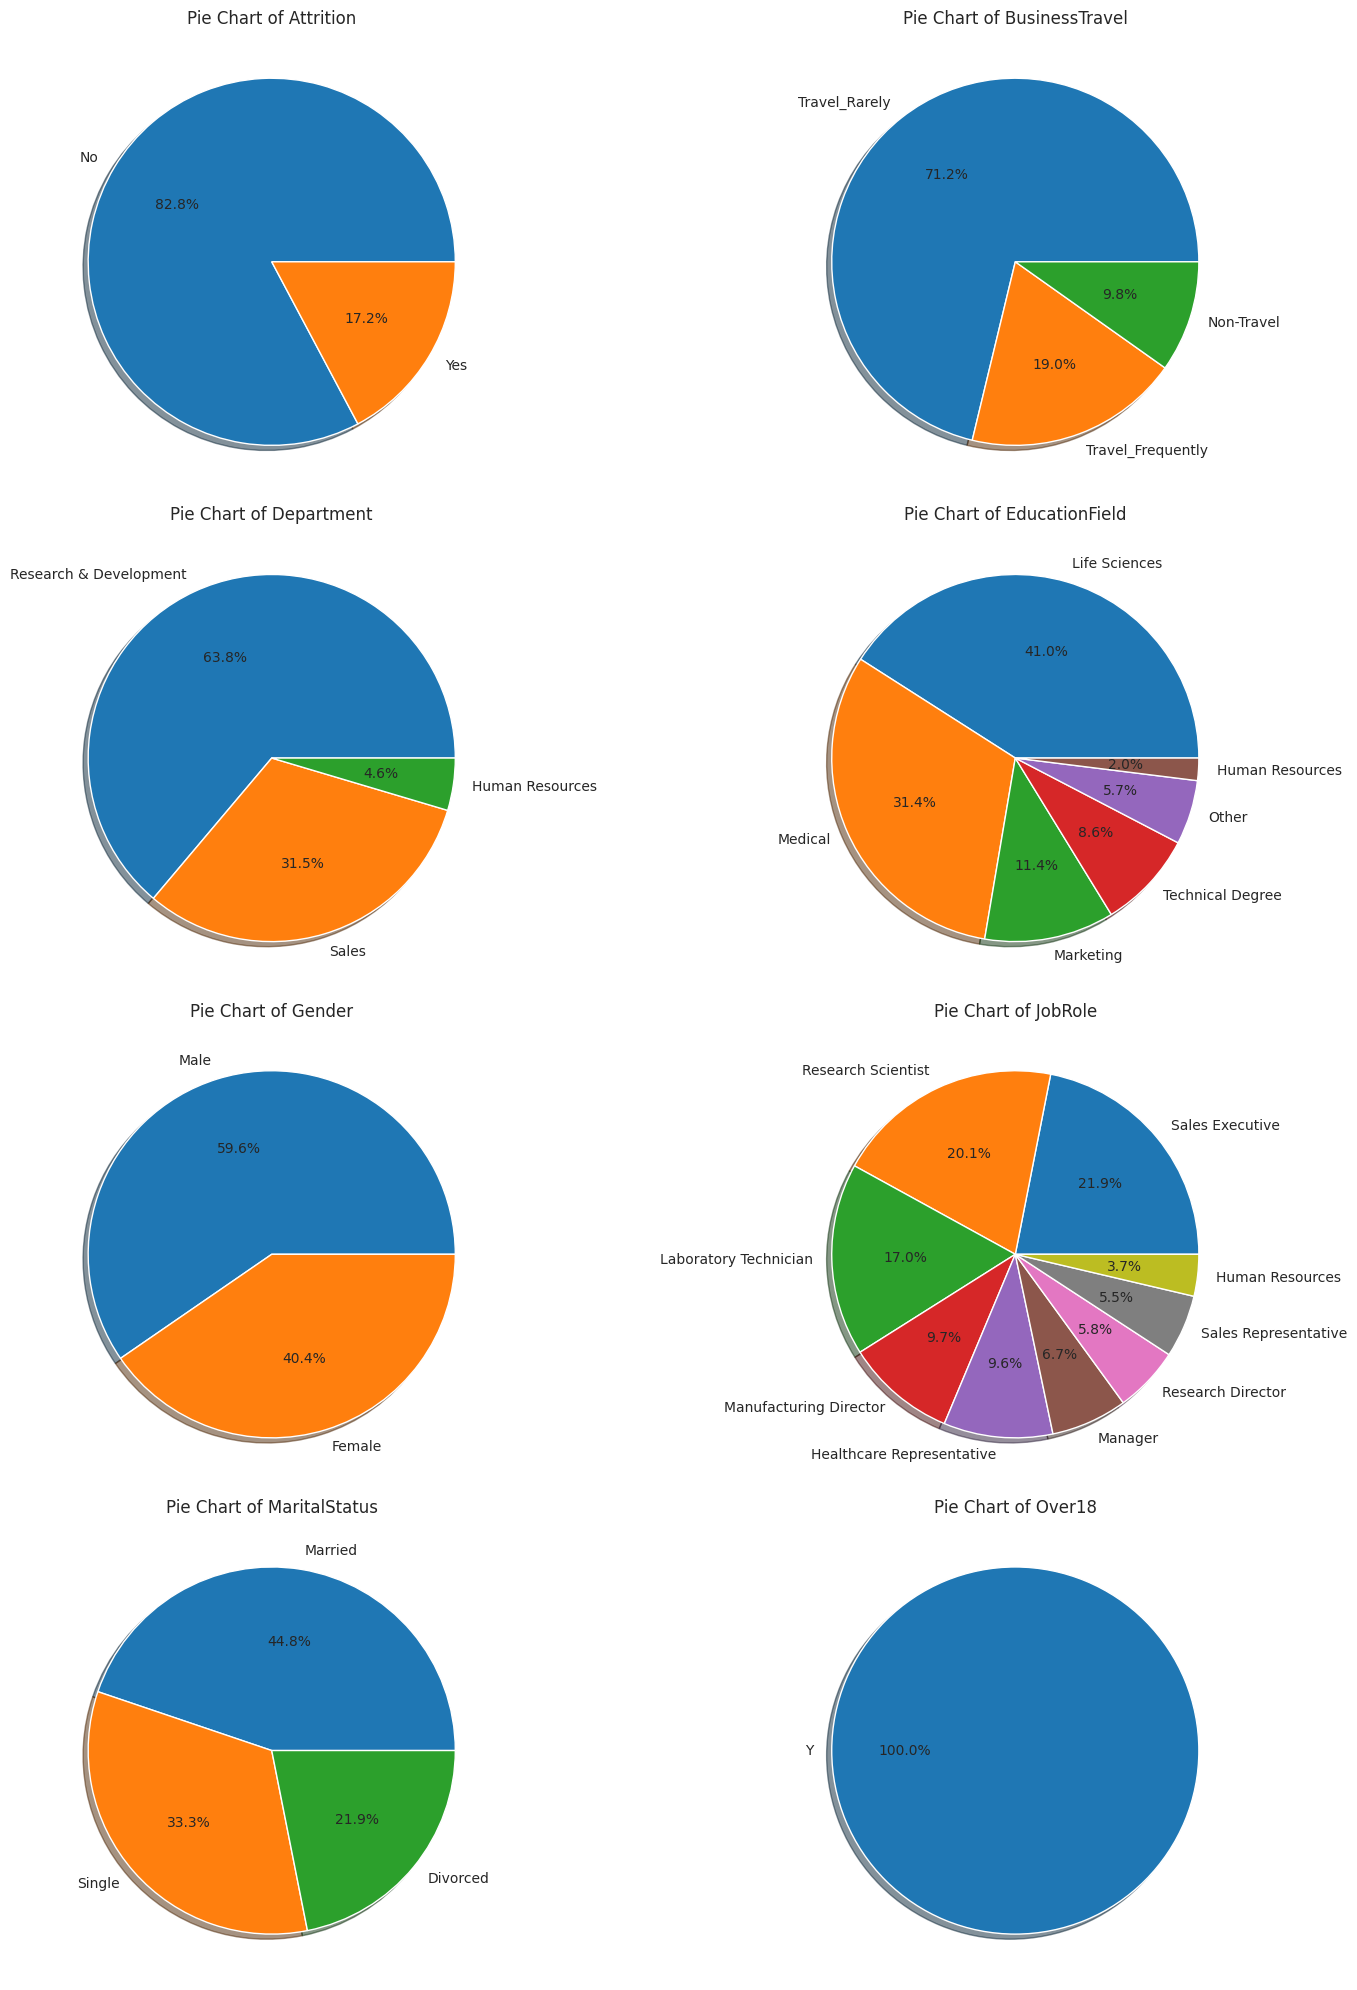

In [ ]:
#lets see how our categorical features are balance or unbalanced so that necessary processing can be followed
# Calculate the number of rows and columns for the subplot grid
num_cols = len(categorical_columns)
num_rows = (num_cols - 1) // 2 + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.tight_layout(pad=3.0)  # Adjust the spacing between subplots

# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(categorical_columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    index = employee_data[col].value_counts().index
    values = employee_data[col].value_counts().values
    ax.pie(values, labels = index , autopct='%1.1f%%', shadow=True, radius=1 )
    plt.tight_layout()
    ax.set_title(f"Pie Chart of {col}")

# Remove any unused subplots
for i in range(len(numerical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
#here some of plots for numerical columns shows they are highly skewed and need to be normalised and brought to same scale before feding to model and PCA and
#to measure their noiseness at same level

#before that lets perform  some processing & label encoding  and one-hot encoding first on these categorical columns and then touch upon this.
categories = ['Attrition', 'Department', 'EducationField','BusinessTravel', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']
employee_data['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
employee_data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
employee_data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
employee_data['EducationField'].unique()

array(['Life Sciences', 'Medical', 'Other', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
employee_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
employee_data['JobRole'].unique()


array(['Healthcare Representative', 'Research Scientist',
       'Human Resources', 'Sales Executive', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [ ]:
employee_data['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [ ]:
employee_data['Over18'].unique()

array(['Y'], dtype=object)

In [ ]:
#lets label encode target variables and other necessary features
employee_data['Attrition'] = employee_data['Attrition'].replace({'Yes':1,'No':0})
employee_data['Gender'] = employee_data['Gender'].replace({'Female':1,'Male':0})
employee_data['Over18'] = employee_data['Over18'].replace({'Y':1})

#lets perform one-hot encoding on necesary categories
employee_data = pd.concat([employee_data,pd.get_dummies(employee_data['BusinessTravel'])],axis=1)
employee_data = pd.concat([employee_data,pd.get_dummies(employee_data['Department'])],axis=1)
employee_data = pd.concat([employee_data,pd.get_dummies(employee_data['EducationField'])],axis=1)
employee_data = pd.concat([employee_data,pd.get_dummies(employee_data['JobRole'])],axis=1)
employee_data = pd.concat([employee_data,pd.get_dummies(employee_data['MaritalStatus'])],axis=1)

#finally drop original columns which aren't used
employee_data.drop(columns = ['Department', 'EducationField','BusinessTravel', 'JobRole', 'MaritalStatus'], inplace = True)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


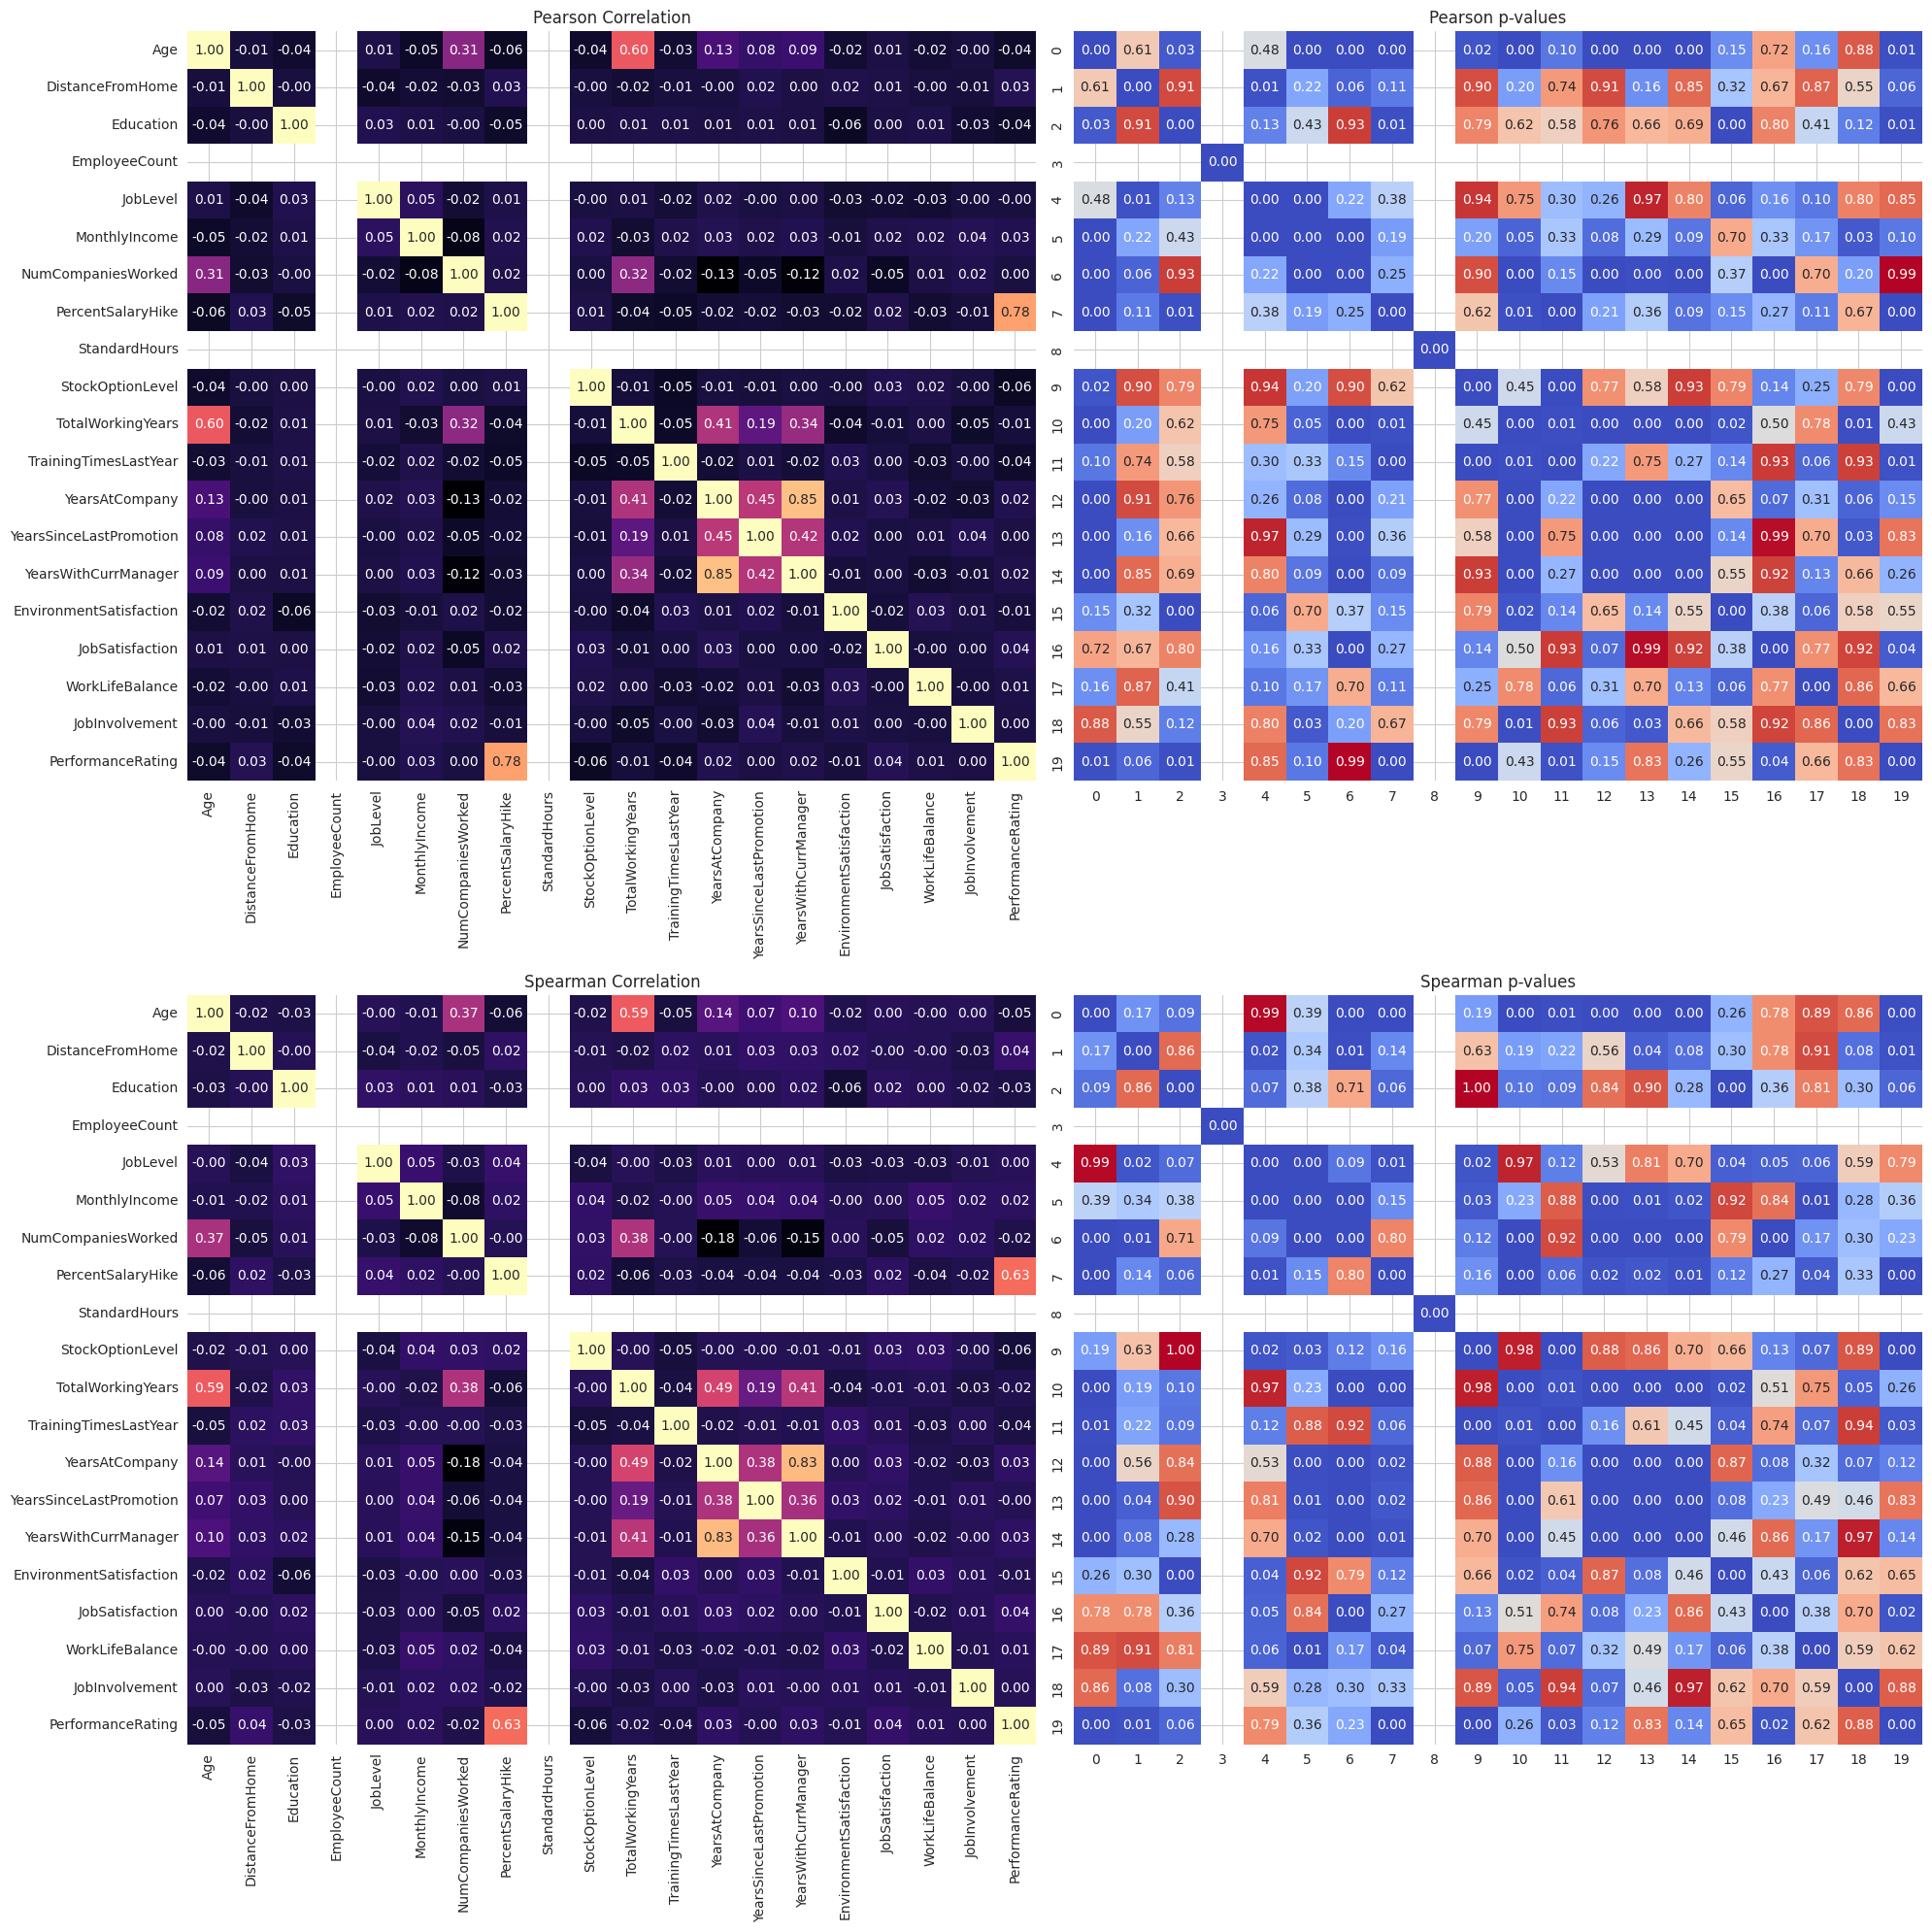

In [ ]:
#lets analyze numerical features in more detail using:

#pearson correlation coefficients with their confidence p-values to measure their linear relationship
#spearman correlation coefficients with their confidence p-values to measure their monotonic relationship either in oppposite or along with it.

# Pearson correlation matrix and p-values
c_data = employee_data[numerical_columns]

pearson_corr = c_data.corr('pearson')

pearson_p_values = np.zeros_like(pearson_corr)
for i in range(len(c_data.columns)):
    for j in range(i + 1, len(c_data.columns)):
        corr, p_value = stats.pearsonr(c_data[c_data.columns[i]], c_data[c_data.columns[j]])
        pearson_p_values[i, j] = pearson_p_values[j, i] = p_value

# Spearman correlation matrix and p-values
spearman_corr = c_data.corr('spearman')

spearman_p_values = np.zeros_like(spearman_corr)
for i in range(len(c_data.columns)):
    for j in range(i + 1, len(c_data.columns)):
        corr, p_value = stats.spearmanr(c_data[c_data.columns[i]], c_data[c_data.columns[j]])
        spearman_p_values[i, j] = spearman_p_values[j, i] = p_value

# Creating a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Heatmap of  Pearson Correlation coefficients
sns.heatmap(pearson_corr, ax=axes[0, 0], cmap='magma', annot=True, fmt=".2f", cbar=False)
axes[0, 0].set_title('Pearson Correlation')

# Heatmap of Pearson p-values
sns.heatmap(pearson_p_values, ax=axes[0, 1], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[0, 1].set_title('Pearson p-values')

# Heatmap of Spearman Correlation coefficients
sns.heatmap(spearman_corr, ax=axes[1, 0], cmap='magma', annot=True, fmt=".2f", cbar=False)
axes[1, 0].set_title('Spearman Correlation')

# Heatmap of Spearman p-values
sns.heatmap(spearman_p_values, ax=axes[1, 1], cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
axes[1, 1].set_title('Spearman p-values')

plt.tight_layout()
plt.show()

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 0 to 4408
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3455 non-null   int64  
 1   Attrition                  3455 non-null   int64  
 2   DistanceFromHome           3455 non-null   int64  
 3   Education                  3455 non-null   int64  
 4   EmployeeCount              3455 non-null   int64  
 5   Gender                     3455 non-null   int64  
 6   JobLevel                   3455 non-null   int64  
 7   MonthlyIncome              3455 non-null   int64  
 8   NumCompaniesWorked         3455 non-null   float64
 9   Over18                     3455 non-null   int64  
 10  PercentSalaryHike          3455 non-null   int64  
 11  StandardHours              3455 non-null   int64  
 12  StockOptionLevel           3455 non-null   int64  
 13  TotalWorkingYears          3455 non-null   float

In [ ]:
# Listing of duplicated column names
duplicated_columns = ['Human Resources']

# Selecting duplicated columns
duplicated_data = employee_data[duplicated_columns[0]].copy()

# Dropping duplicated columns
employee_data.drop(columns=duplicated_columns, inplace=True)

# Concatenating the duplicated columns back to the DataFrame
employee_data = pd.concat([employee_data, duplicated_data], axis=1)

# Displaying the updated DataFrame information
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 0 to 4408
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3455 non-null   int64  
 1   Attrition                  3455 non-null   int64  
 2   DistanceFromHome           3455 non-null   int64  
 3   Education                  3455 non-null   int64  
 4   EmployeeCount              3455 non-null   int64  
 5   Gender                     3455 non-null   int64  
 6   JobLevel                   3455 non-null   int64  
 7   MonthlyIncome              3455 non-null   int64  
 8   NumCompaniesWorked         3455 non-null   float64
 9   Over18                     3455 non-null   int64  
 10  PercentSalaryHike          3455 non-null   int64  
 11  StandardHours              3455 non-null   int64  
 12  StockOptionLevel           3455 non-null   int64  
 13  TotalWorkingYears          3455 non-null   float

In [ ]:
#Using principal component analysis to reduce the dimensionality of the one-hot encoded categorical variables losing some of the variances,
#but simultaneously, using a couple of principal components instead of tens of one-hot encoded features to construct a better model

one_hot_encoded = employee_data.iloc[:,23:45]

n_components = 5

pca_list = list()
feature_weight_list = list()

for n in range(1,6):

  PCAmod = PCA(n_components = n)
  PCAmod.fit(one_hot_encoded)

  pca_list.append(pd.Series({
      'n' : n,
      'model' : PCAmod,
      'var' : PCAmod.explained_variance_ratio_.sum()
  }))

  weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
  overall_contributions = np.abs(PCAmod.components_)*weights
  abs_feature_values = overall_contributions.sum(axis = 0)
  feature_weight_list.append(pd.DataFrame({
      'n' : n,
      'features' : one_hot_encoded.columns ,
      'values' : abs_feature_values / abs_feature_values.sum(),
  }))

pca_report = pd.concat(pca_list, axis = 1).T.set_index('n')
feature_importance_report = pd.concat(feature_weight_list).pivot(index = 'n' , columns = 'features' , values = 'values')
pca_report

,model,var
n,,
1,PCA(n_components=1),0.156227
2,PCA(n_components=2),0.283022
3,PCA(n_components=3),0.400983
4,PCA(n_components=4),0.504769
5,PCA(n_components=5),0.586046


In [ ]:
feature_importance_report

features,Divorced,Healthcare Representative,Human Resources,Laboratory Technician,Life Sciences,Manager,Manufacturing Director,Marketing,Married,Medical,...,Research & Development,Research Director,Research Scientist,Sales,Sales Executive,Sales Representative,Single,Technical Degree,Travel_Frequently,Travel_Rarely
n,,,,,,,,,,,,,,,,,,,,,
1,0.031083,0.001951,0.007982,0.008692,0.038844,0.002162,0.002544,0.115945,0.067091,0.073009,...,0.261013,0.004018,0.010552,0.253031,0.009815,0.008210,0.036007,0.001323,0.029505,0.025580
2,0.030329,0.001836,0.006371,0.011188,0.069598,0.007724,0.002848,0.077526,0.158819,0.064960,...,0.166207,0.005164,0.014329,0.159836,0.015278,0.004568,0.128490,0.004368,0.023355,0.028296
3,0.041052,0.003099,0.005136,0.010107,0.126188,0.006566,0.005846,0.057593,0.140795,0.116726,...,0.122118,0.003651,0.014133,0.116982,0.015649,0.003833,0.099743,0.005138,0.039222,0.047299
4,0.034152,0.002692,0.006278,0.011708,0.119008,0.005928,0.007615,0.048544,0.124629,0.105563,...,0.101314,0.003501,0.013710,0.095036,0.012629,0.004217,0.090477,0.006825,0.076532,0.098086
5,0.073227,0.004606,0.007925,0.012727,0.109166,0.005845,0.008503,0.042594,0.123675,0.097671,...,0.091695,0.004005,0.013611,0.083770,0.014948,0.003800,0.106398,0.006785,0.071359,0.086368


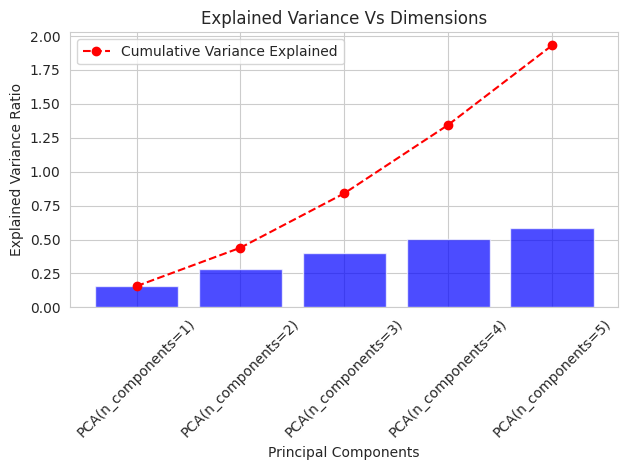

In [ ]:

value = pca_report['var']
model = pca_report.index
models = pca_report['model']

plt.bar(model,value, color='b', alpha=0.7)

cumulative_sum = value.cumsum()
plt.plot(model, cumulative_sum, marker='o', color='r', label='Cumulative Variance Explained', linestyle='--')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Vs Dimensions')
plt.legend(loc='upper left')

plt.xticks(model, models, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance Vs Dimensions')]

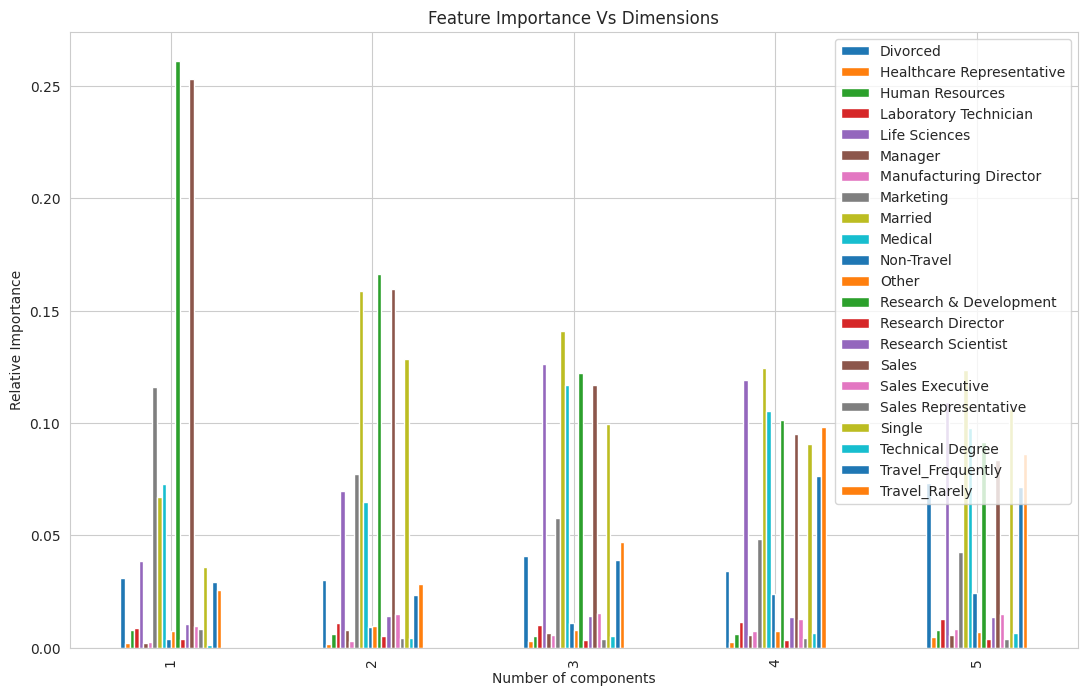

In [ ]:
ax = feature_importance_report.plot(kind = 'bar' , figsize = (13,8))
ax.legend(loc = 'upper right')
ax.set(xlabel = 'Number of components' ,  ylabel = 'Relative Importance' , title = 'Feature Importance Vs Dimensions')

In [ ]:
# let's do feature selection using a chi-squared (chi²) statistical test for non-negative features to select k (k=10) of the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_sample = employee_data.drop(columns = 'Attrition')
y_sample = employee_data['Attrition']

#lets eliminate negative values
X_sample[X_sample<0] = 0

#applying SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X_sample,y_sample)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_sample.columns)

#concatenating two dataframes for better visualization

# feature scores
F_Scores = pd.concat([df_columns,df_scores],axis=1)
F_Scores.columns = ['Specs','Score']

# Score value is directly proportional to the feature importance
F_Scores

,Specs,Score
0,Age,204.771677
1,DistanceFromHome,4.740201
2,Education,2.152352
3,EmployeeCount,0.000000
4,Gender,1.043556
5,JobLevel,0.679885
6,MonthlyIncome,16823.006978
7,NumCompaniesWorked,10.087819
8,Over18,0.000000
9,PercentSalaryHike,6.715538


In [ ]:
# printing 10 best features in descending order
print(F_Scores.nlargest(10,'Score'))

                   Specs         Score
6          MonthlyIncome  16823.006978
12     TotalWorkingYears    512.167204
14        YearsAtCompany    363.730472
16  YearsWithCurrManager    298.317130
0                    Age    204.771677
42                Single     81.698850
23     Travel_Frequently     37.532801
40              Divorced     28.266616
44       Human Resources     21.063685
43       Human Resources     18.754554


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


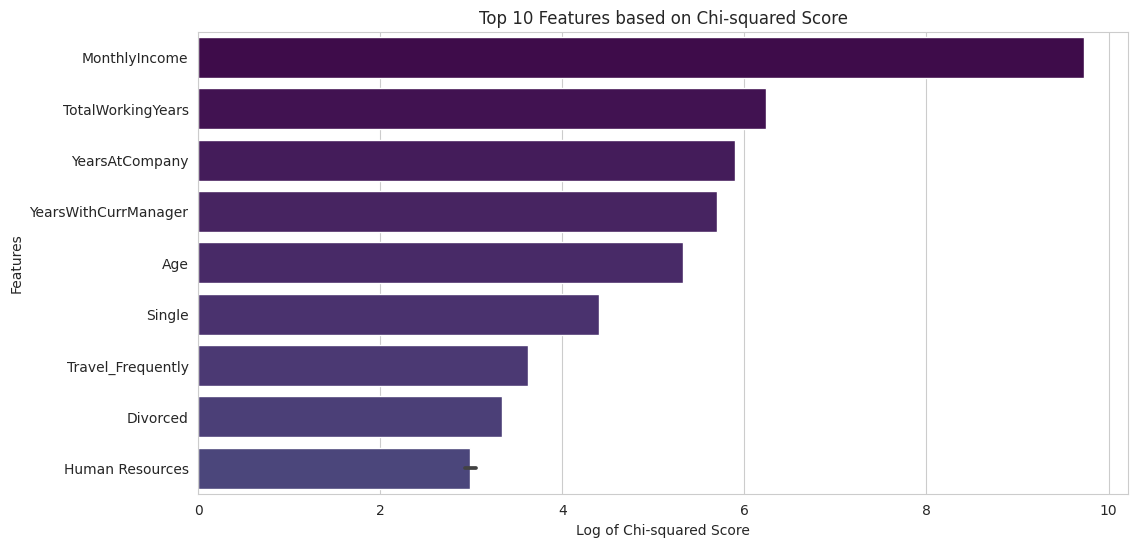

In [ ]:
import numpy as np
custom_palette = sns.color_palette("viridis",as_cmap=True)
sns.set_style('whitegrid')
colors = custom_palette(np.linspace(0, 1, len(F_Scores)))

f_scores = F_Scores.copy()
f_scores['Log_Score'] = np.log(F_Scores['Score'])  # Computing the log of the F-scores for easy visualisation

# Sorting the features by log scores in descending order
f_scores = f_scores.sort_values(by='Log_Score', ascending=False)

# Creating a bar plot to visualize feature scores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Log_Score', y='Specs', data=f_scores.head(10), palette = colors)  # Select the top 10 features
plt.title('Top 10 Features based on Chi-squared Score')
plt.xlabel('Log of Chi-squared Score')
plt.ylabel('Features')
plt.show()